# Applications

In [ ]:
def json_print(data):
    print(json.dumps(data, indent=2))

In [ ]:
import weaviate, os, json
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

auth_config = weaviate.auth.AuthApiKey(api_key=os.getenv("WEAVIATE_API_KEY"))

client = weaviate.Client(
    url=os.getenv("WEAVIATE_API_URL"),
    auth_client_secret=auth_config,
    additional_headers={
        "X-Cohere-Api-Key": os.getenv("COHERE_API_KEY"),
        "X-Cohere-BaseURL": os.getenv("CO_API_URL")
    }
)

client.is_ready() #check if True

### 2. How many vectors are stored in this database

In [ ]:
print(json.dumps(client.query.aggregate("Wikipedia").with_meta_count().do(), indent=2))

### 3. Perform search over them to find concepts you are interested in!

In [ ]:
response = (client.query
            .get("Wikipedia",['text','title','url','views','lang'])
            .with_near_text({"concepts": "Vacation spots in california"})
            .with_limit(5)
            .do()
           )

json_print(response)

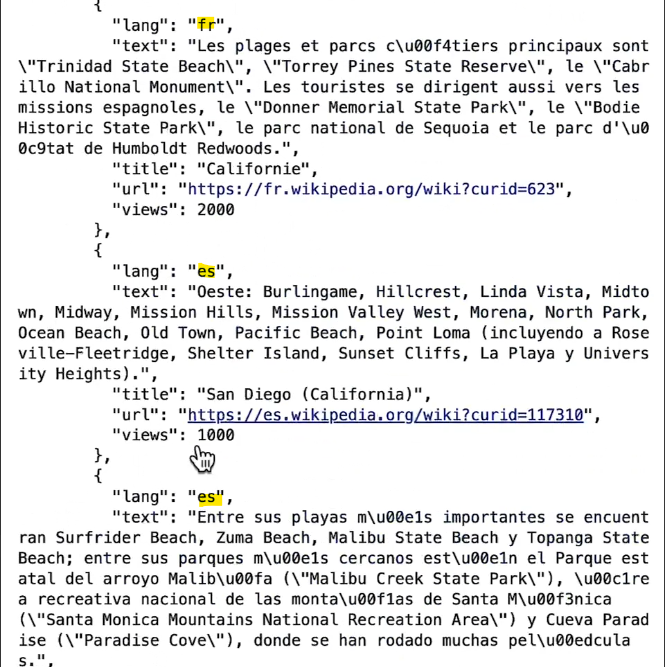

In [ ]:
response = (client.query
            .get("Wikipedia",['text','title','url','views','lang'])
            .with_near_text({"concepts": "Vacation spots in california"})
            .with_where({
                "path" : ['lang'],
                "operator" : "Equal",
                "valueString":'en'
            })
            .with_limit(3)
            .do()
           )

json_print(response)

In [ ]:
response = (client.query
            .get("Wikipedia",['text','title','url','views','lang'])
            .with_near_text({"concepts": "Miejsca na wakacje w Kalifornii"})
            .with_where({
                "path" : ['lang'],
                "operator" : "Equal",
                "valueString":'en'
            })
            .with_limit(3)
            .do()
           )

json_print(response)

In [ ]:
response = (client.query
            .get("Wikipedia",['text','title','url','views','lang'])
            .with_near_text({"concepts": "أماكن العطلات في كاليفورنيا"})
            .with_where({
                "path" : ['lang'],
                "operator" : "Equal",
                "valueString":'en'
            })
            .with_limit(3)
            .do()
           )

json_print(response)

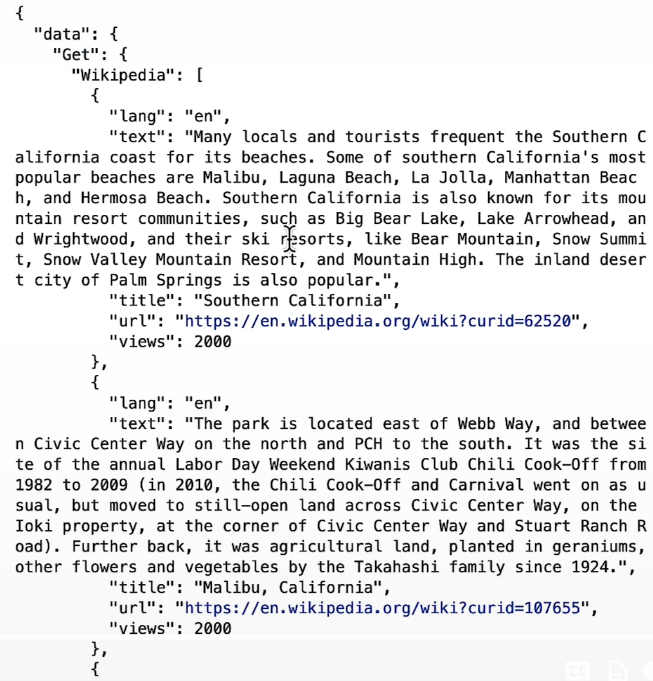

## Retrieval Augmented Generation

### Single Prompt

In [ ]:
prompt = "Write me a facebook ad about {title} using information inside {text}"
result = (
  client.query
  .get("Wikipedia", ["title","text"])
  .with_generate(single_prompt=prompt)
  .with_near_text({
    "concepts": ["Vacation spots in california"]
  })
  .with_limit(3)
).do()

json_print(result)

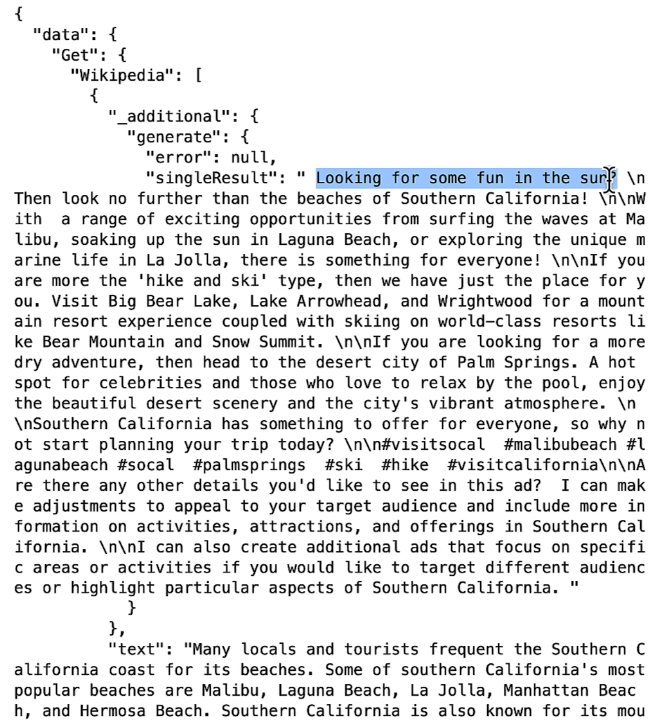

### Group Task

In [ ]:
generate_prompt = "Summarize what these posts are about in two paragraphs."

result = (
  client.query
  .get("Wikipedia", ["title","text"])
  .with_generate(grouped_task=generate_prompt) # Pass in all objects at once
  .with_near_text({
    "concepts": ["Vacation spots in california"]
  })
  .with_limit(3)
).do()

json_print(result)


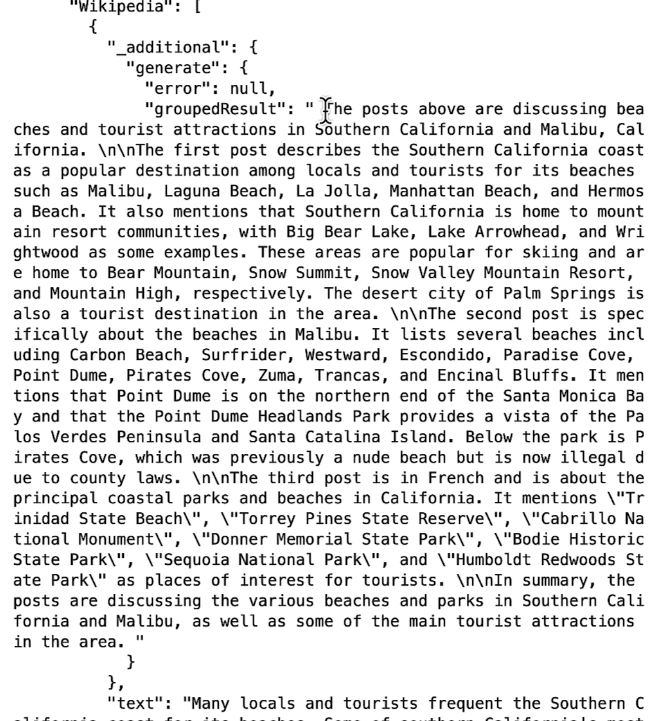